# Entrainement MNIST

## Bibliothèqes utilisées

In [94]:
#Generique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# prépa données
from sklearn.model_selection import train_test_split

# DL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Deconv2D
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations

# Evaluation
from sklearn.metrics import confusion_matrix

#MISC
import warnings
warnings.filterwarnings("ignore")


## Recupération des données

In [2]:
df = pd.read_csv('mnist.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Préparation des données

In [3]:
features = df.drop(['label'],axis = 1)
target = df['label']

In [4]:
# Normalisation
features = features/255

In [5]:
# Partition en jeu d'entrainement et jeu de validation
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2)

In [31]:
# Mise au format idoine pour un CNN
X_TRAIN = np.array(X_train).reshape(-1,28,28,1)
X_TEST = np.array(X_test).reshape(-1,28,28,1)
Y_TRAIN = np.array(y_train).reshape(-1,)
Y_TEST =  np.array(y_test).reshape(-1,)

In [32]:
# Vérification
print(f'X_TRAIN shape : {X_TRAIN.shape}')
print(f'X_TEST shape : {X_TEST.shape}')
print(f'Y_TRAIN shape : {Y_TRAIN.shape}')
print(f'Y_TEST shape : {Y_TEST.shape}')

X_train shape : (33600, 28, 28, 1)
X_train shape : (8400, 28, 28, 1)
X_train shape : (33600,)
X_train shape : (8400,)


## Modele convolutif

In [35]:

model = Sequential()
model.add(Conv2D(10, (3,3), padding='same', input_shape=(28,28,1)))
model.add(LeakyReLU())

model.add(Conv2D(16, (3,3), padding='same'))
model.add(LeakyReLU())

model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Dropout(0.25))

model.add(Conv2D(16,(3,3),padding='same'))
model.add(LeakyReLU())

model.add(Conv2D(16,(3,3),padding='same'))
model.add(LeakyReLU())

model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64))
model.add(LeakyReLU())

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

epok =10

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

training_history = model.fit(X_TRAIN, Y_TRAIN, validation_data = (X_TEST, Y_TEST), epochs = epok, batch_size = 32)

Epoch 1/10
1050/1050 [==============================] - 26s 24ms/step - loss: 0.3176 - accuracy: 0.8979 - val_loss: 0.0961 - val_accuracy: 0.9702
Epoch 2/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1740 - accuracy: 0.9467 - val_loss: 0.0876 - val_accuracy: 0.9738
Epoch 3/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1539 - accuracy: 0.9544 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 4/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1565 - accuracy: 0.9532 - val_loss: 0.0597 - val_accuracy: 0.9808
Epoch 5/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1466 - accuracy: 0.9560 - val_loss: 0.0635 - val_accuracy: 0.9788
Epoch 6/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1438 - accuracy: 0.9576 - val_loss: 0.0700 - val_accuracy: 0.9757
Epoch 7/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1384 - accuracy: 0.9595 - val_loss: 0.0599 -

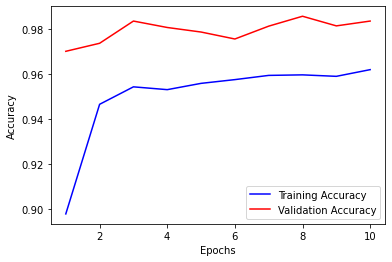

In [36]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(np.arange(1,epok +1,1),training_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(np.arange(1,epok +1,1),training_history.history['val_accuracy'], label='Validation Accuracy', color='red')

plt.legend()

plt.show()

In [37]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
leaky_re_lu_105 (LeakyReLU)  (None, 28, 28, 10)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 28, 28, 16)        1456      
_________________________________________________________________
leaky_re_lu_106 (LeakyReLU)  (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 9, 9, 16)          0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 9, 9, 16)        

## Evaluation

In [38]:
score = model.evaluate(X_TEST,Y_TEST)

263/263 [==============================] - 1s 5ms/step - loss: 0.0516 - accuracy: 0.9837


## Aperçu des données et des résultats

In [48]:
y_softmax = model.predict(X_TEST)
y_pred = np.argmax(y_softmax,axis=-1)

 On affiche un échantillon de valeur

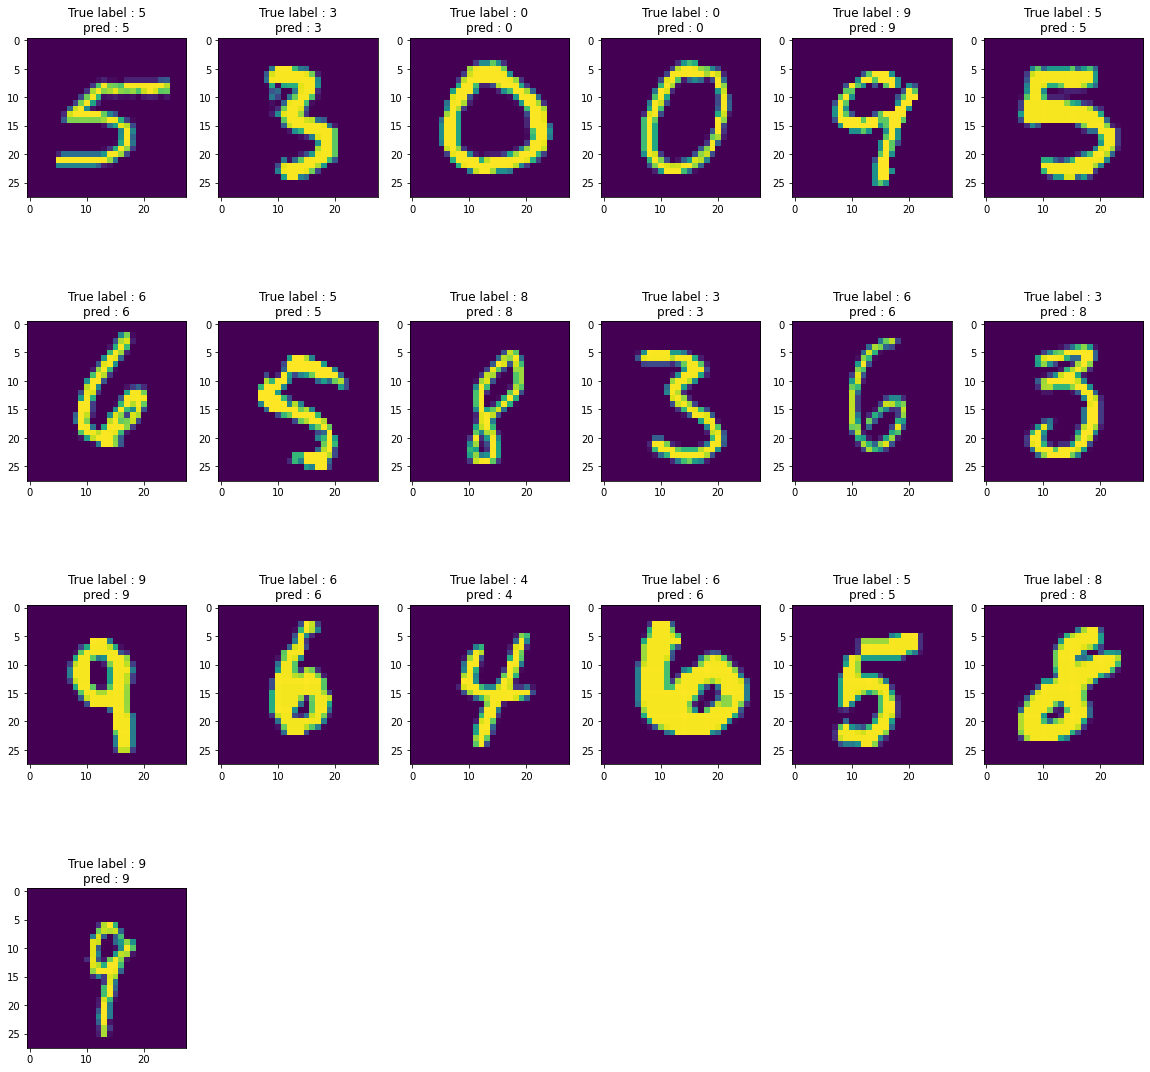

In [87]:
plt.figure(figsize=(20,20))

j = 1
for i in range(1,20):
    img = X_TEST[i]
    img = img.reshape(28,28)
    
    plt.subplot(4,6,j)
    j = j+1
   
    plt.imshow(img)
    
    plt.title(f'True label : {str(Y_TEST[i])}' + '\n' + f'pred : {str(y_pred[i])}')
       
        

On imprime des erreurs

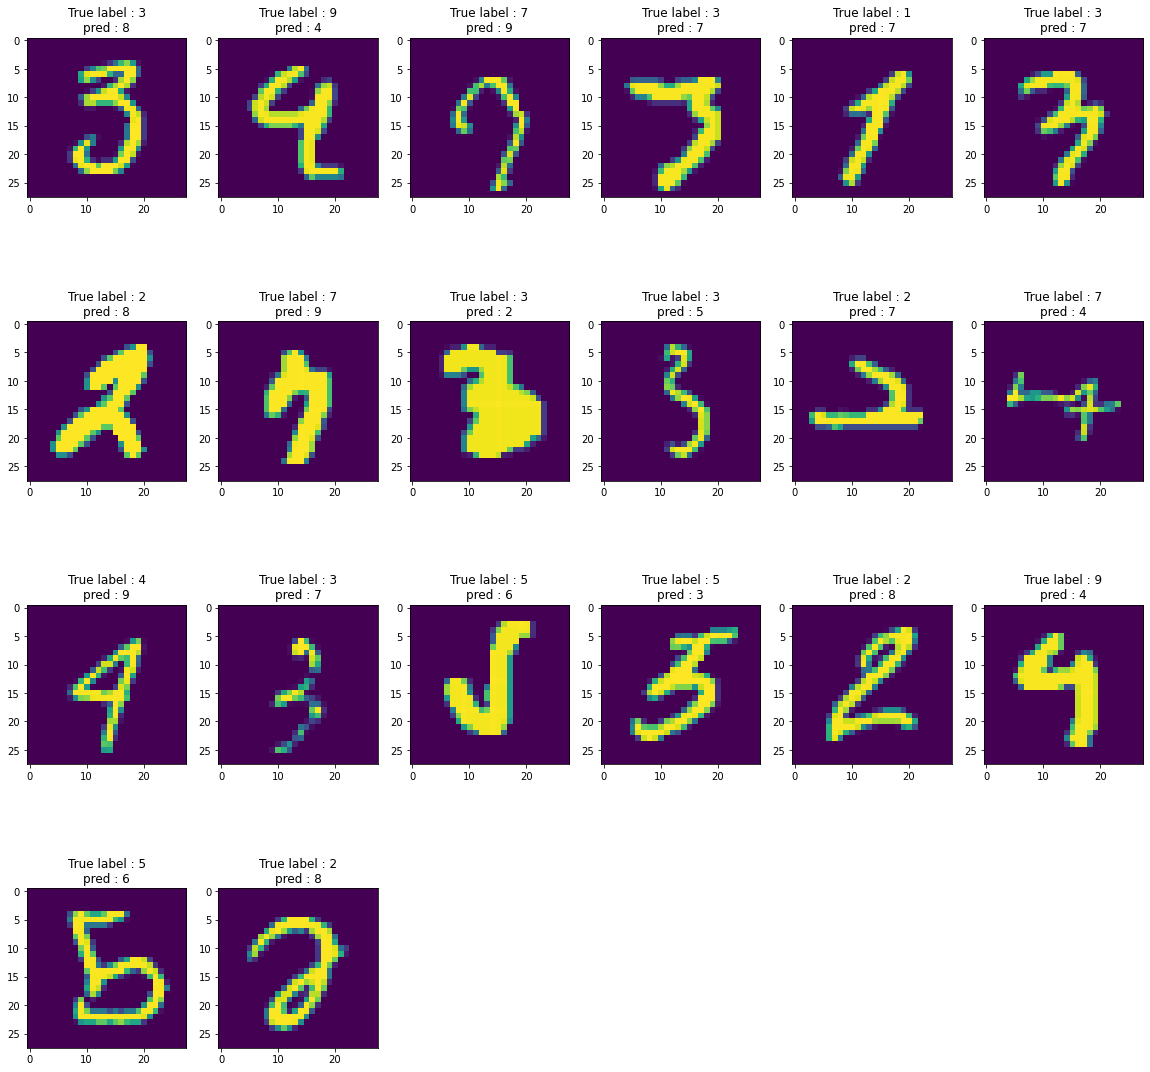

In [92]:
error = []

for i in range(len(y_pred)):
    if Y_TEST[i] != y_pred[i]:
        error.append(i)
        
plt.figure(figsize=(20,20))

j = 1
for i in error[0:20]:
    img = X_TEST[i]
    img = img.reshape(28,28)
    
    plt.subplot(4,6,j)
    j = j+1
   
    plt.imshow(img)
    
    plt.title(f'True label : {str(Y_TEST[i])}' + '\n' + f'pred : {str(y_pred[i])}')

On affiche la matrice de confusion

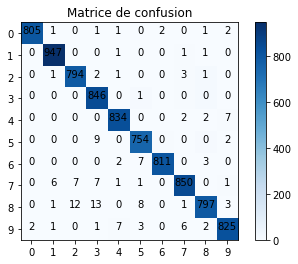

In [96]:
cnf_matrix = confusion_matrix(Y_TEST,y_pred)

classes = range(0,10)

plt.figure()
plt.imshow(cnf_matrix,interpolation ='nearest',cmap = 'Blues')
plt.title('Matrice de confusion')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)

for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        plt.text(i,j,cnf_matrix[i,j],horizontalalignment ='center')
        
plt.show()
        